# Analyse Factorielle des Correspondances Simples (AFC)

## Mastère ESD - Introduction au Machine Learning

## Librairies utilisées

Données accidents aux Etats-Unis sur la période 1973-1978 [à télécharger](USAccDeaths.csv)

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from prince import CA

## Données utilisées

In [2]:
df = pandas.read_csv("USAccDeaths.csv", index_col = "Year")
df.columns.rename("Month", inplace = True)
df.index.rename("Year", inplace = True)
df

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1973,9007,8106,8928,9137,10017,10826,11317,10744,9713,9938,9161,8927
1974,7750,6981,8038,8422,8714,9512,10120,9823,8743,9129,8710,8680
1975,8162,7306,8124,7870,9387,9556,10093,9620,8285,8466,8160,8034
1976,7717,7461,7767,7925,8623,8945,10078,9179,8037,8488,7874,8647
1977,7792,6957,7726,8106,8890,9299,10625,9302,8314,8850,8265,8796
1978,7836,6892,7791,8192,9115,9434,10484,9827,9110,9070,8633,9240


## Calcul de AFC

In [3]:
ca = CA(n_components = 5) # minimum du nombre de modalités - 1
ca.fit(df)

## Valeurs propres

In [4]:
print(ca.eigenvalues_)
print(ca.total_inertia_)
print(ca.percentage_of_variance_) # CHANGEMENT ICI

[3.76283456e-04 1.85670084e-04 7.57831853e-05 3.76894447e-05
 2.45791383e-05]
0.0007000053078490678
[53.75437181 26.52409655 10.82608723  5.38416556  3.51127885]


In [5]:
eig = pandas.DataFrame(
    { 
        "Dimension" : ["Dim" + str(x + 1) for x in range(5)],
        "% variance expliquée": numpy.round(ca.percentage_of_variance_, 4) * 100,
        "% variance expliquée cumulée": numpy.round(numpy.cumsum(ca.percentage_of_variance_), 4) * 100,
    }
)
eig

,Dimension,% variance expliquée,% variance expliquée cumulée
0,Dim1,5375.44,5375.44
1,Dim2,2652.41,8027.85
2,Dim3,1082.61,9110.46
3,Dim4,538.42,9648.87
4,Dim5,351.13,10000.00


## Choix des facteurs

/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


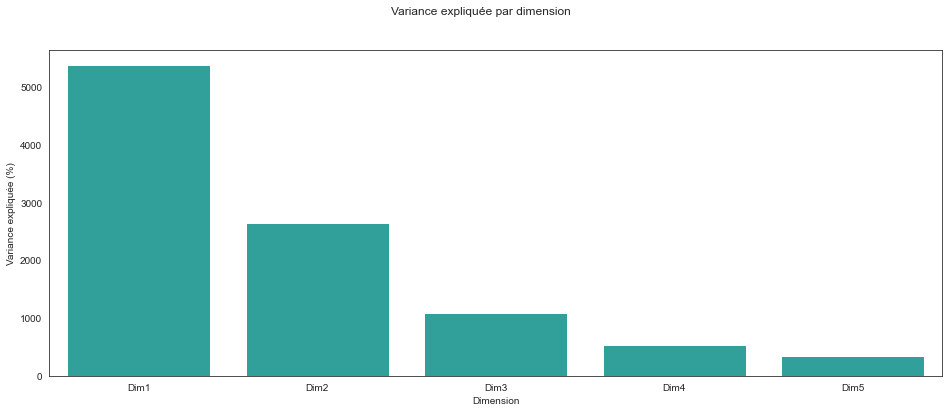

In [6]:
plt.figure(figsize=(16, 6))
g_eig = seaborn.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

## Représentation des lignes

In [7]:
df_row = pandas.DataFrame(ca.row_coordinates(df)).rename(columns = {0: "Dim1", 1: "Dim2"})
df_row

,Dim1,Dim2,2,3,4
Year,,,,,
1973,0.017407,-0.013220,0.004260,0.004290,0.006992
1974,-0.013806,-0.014447,0.011227,-0.001709,-0.006420
1975,0.030026,-0.000779,-0.009876,-0.003899,-0.005081
1976,0.003461,0.024649,0.009397,-0.004836,0.002169
1977,-0.011677,0.010810,-0.004949,0.011591,-0.002571
1978,-0.026633,-0.004477,-0.010296,-0.005888,0.004086


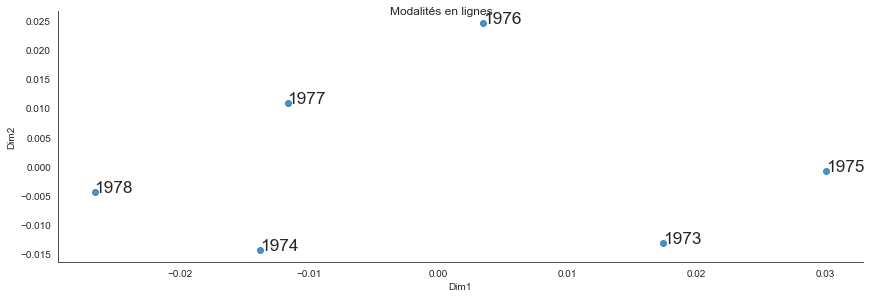

In [8]:
g_row = seaborn.lmplot(x = "Dim1", y = "Dim2", data = df_row, fit_reg = False, 
                       height = 4, aspect = 3)
g_row.fig.suptitle("Modalités en lignes")
for i in df_row.index:
    plt.text(df_row.loc[i].Dim1, df_row.loc[i].Dim2, i, size = "xx-large")
plt.show()

## Représentation des colonnes

In [9]:
df_col = pandas.DataFrame(ca.column_coordinates(df)).rename(columns = {0: "Dim1", 1: "Dim2"})
df_col

/usr/local/lib/python3.9/site-packages/prince/ca.py:206: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  is_sparse = X.dtypes.apply(pd.api.types.is_sparse).all()


,Dim1,Dim2,2,3,4
Month,,,,,
January,0.023375,0.003002,-0.004639,0.001429,0.001994
February,0.029632,0.024436,0.014401,-0.006230,0.005528
March,0.018686,-0.000595,0.006133,-0.003373,-0.006826
April,-0.006568,-0.003396,0.013345,0.004948,-0.001407
May,0.018069,0.002971,-0.018906,-0.002541,-0.001863
June,0.013585,-0.011738,-0.001110,0.005372,0.000419
July,-0.006641,0.014813,-0.006718,0.011894,0.000836
August,0.001480,-0.010823,0.000180,-0.007366,-0.002311
September,-0.014577,-0.019645,-0.003744,-0.005379,0.011479


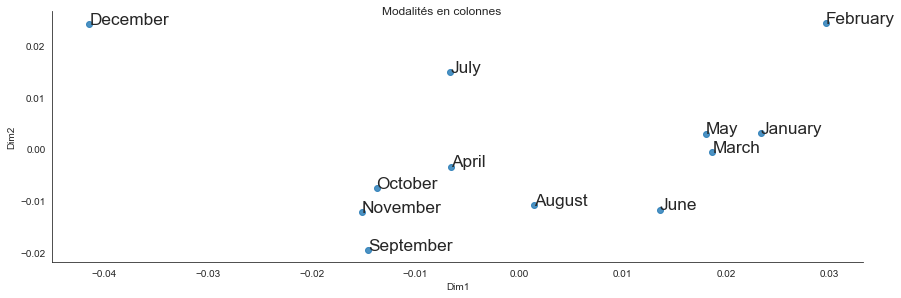

In [10]:
g_col = seaborn.lmplot(x = "Dim1", y = "Dim2", data = df_col, fit_reg = False, 
                       height = 4, aspect = 3)
g_col.fig.suptitle("Modalités en colonnes")
for i in df_col.index:
    plt.text(df_col.loc[i].Dim1, df_col.loc[i].Dim2, i, size = "xx-large")
plt.show()

## Représentation simultanée

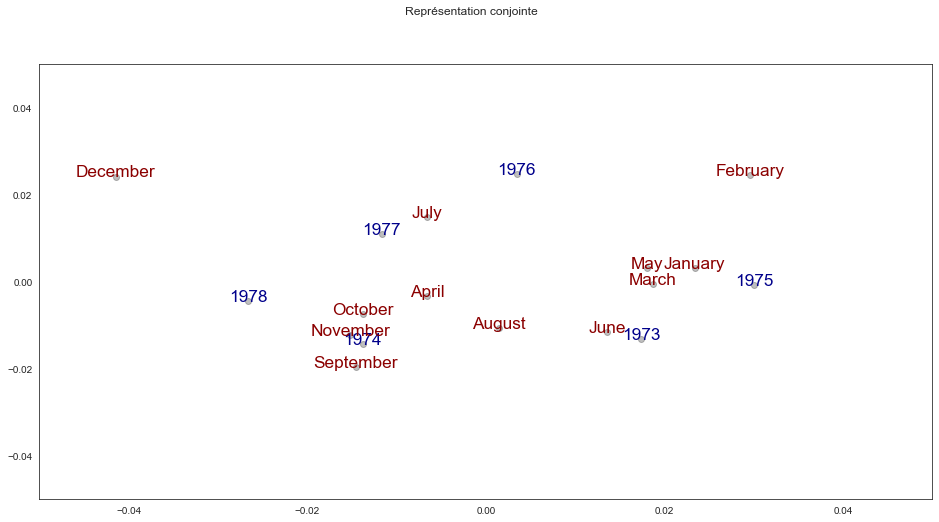

In [11]:
fig = plt.figure(figsize = (16,8))
plt.xlim(-.05, .05)
plt.ylim(-.05, .05)

for i in df_row.index:
    plt.scatter(df_row.loc[i].Dim1, df_row.loc[i].Dim2, alpha = .25, c = "black")
    plt.text(df_row.loc[i].Dim1, df_row.loc[i].Dim2, i, size = "xx-large", color = "darkblue", ha = "center")

for i in df_col.index:
    plt.scatter(df_col.loc[i].Dim1, df_col.loc[i].Dim2, alpha = .25, c = "black")
    plt.text(df_col.loc[i].Dim1, df_col.loc[i].Dim2, i, size = "xx-large", color = "darkred", ha = "center")

fig.suptitle("Représentation conjointe")
plt.show()

## Importance de chaque modalité

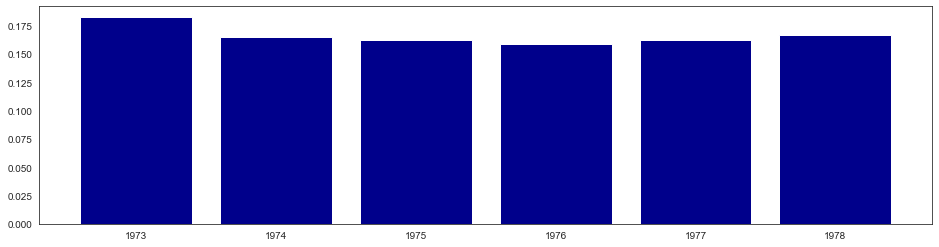

In [12]:
plt.figure(figsize = (16, 4))
plt.bar(df.index, ca.row_masses_, color = "darkblue")
plt.show()

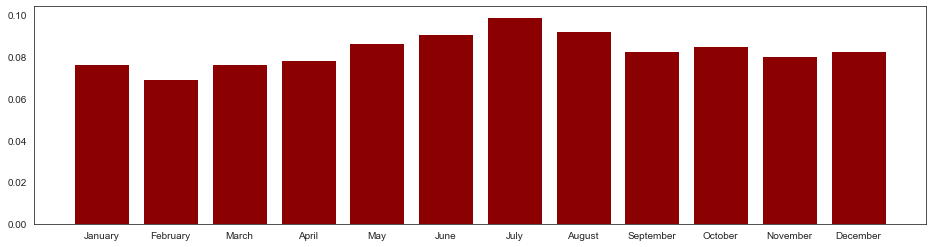

In [13]:
plt.figure(figsize = (16, 4))
plt.bar(df.columns, ca.col_masses_, color = "darkred")
plt.show()

## AFC - Profils lignes

In [14]:
p_row = df.div(df.sum(axis=1), axis=0).round(4) * 100
p_row

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1973,7.78,7.00,7.71,7.89,8.65,9.35,9.77,9.28,8.39,8.58,7.91,7.71
1974,7.41,6.67,7.68,8.05,8.33,9.09,9.67,9.39,8.36,8.73,8.33,8.30
1975,7.92,7.09,7.88,7.64,9.11,9.27,9.79,9.33,8.04,8.21,7.92,7.80
1976,7.66,7.41,7.71,7.87,8.56,8.88,10.00,9.11,7.98,8.43,7.82,8.58
1977,7.57,6.76,7.51,7.88,8.64,9.03,10.32,9.04,8.08,8.60,8.03,8.55
1978,7.42,6.53,7.38,7.76,8.63,8.93,9.93,9.30,8.62,8.59,8.17,8.75


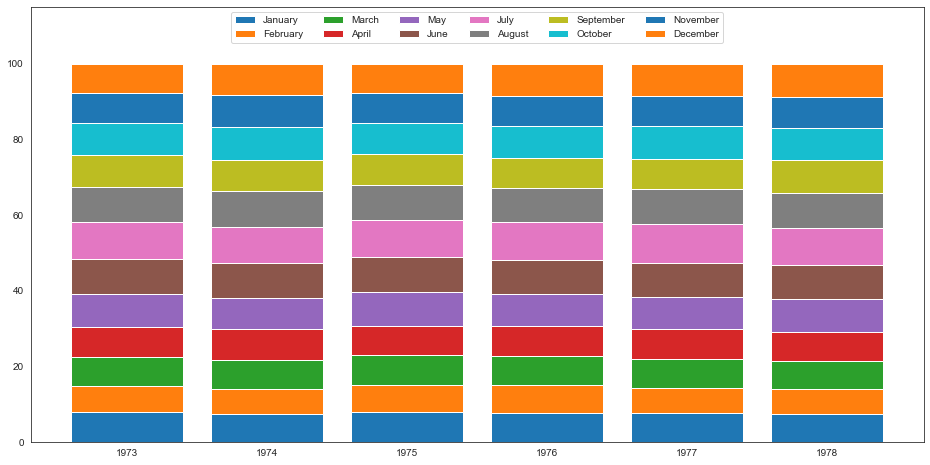

In [15]:
fig = plt.figure(figsize = (16, 8))
base = numpy.zeros(6)
for m in p_row.columns:
    plt.bar(p_row.index, p_row[m], bottom = base, label = m)
    base = base + p_row[m]
plt.margins(0.05, 0.15)
plt.legend(ncol = 6, loc = 9)
plt.show()

## AFC - Profils colonnes


In [16]:
p_col = df.div(df.sum(axis=0), axis=1).round(4) * 100
p_col

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1973,18.66,18.55,18.46,18.40,18.30,18.80,18.04,18.37,18.61,18.42,18.03,17.06
1974,16.06,15.97,16.62,16.96,15.92,16.52,16.14,16.79,16.75,16.92,17.14,16.59
1975,16.91,16.72,16.79,15.85,17.15,16.60,16.09,16.45,15.87,15.69,16.06,15.35
1976,15.99,17.07,16.06,15.96,15.75,15.54,16.07,15.69,15.40,15.74,15.50,16.53
1977,16.14,15.92,15.97,16.33,16.24,16.15,16.94,15.90,15.93,16.41,16.27,16.81
1978,16.24,15.77,16.11,16.50,16.65,16.39,16.72,16.80,17.45,16.81,16.99,17.66


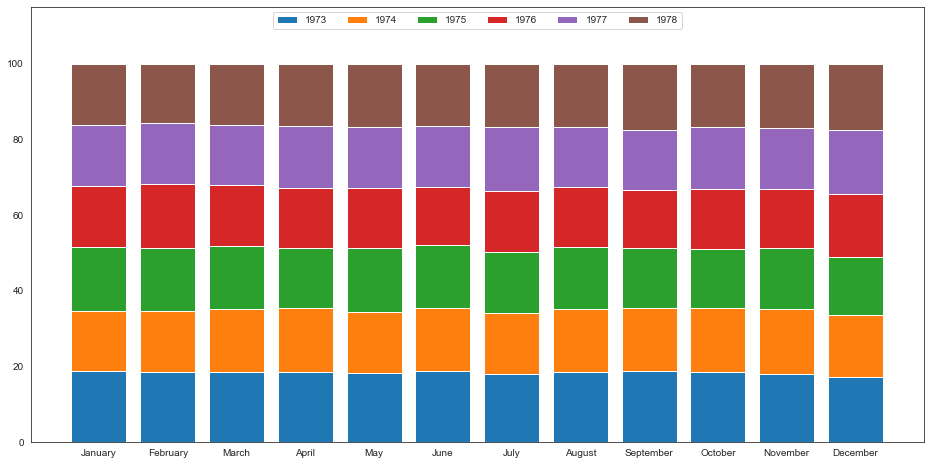

In [17]:
fig = plt.figure(figsize = (16, 8))
base = numpy.zeros(12)
for m in p_col.index:
    plt.bar(p_col.columns, p_col.loc[m], bottom = base, label = m)
    base = base + p_col.loc[m]
plt.margins(0.05, 0.15)
plt.legend(ncol = 6, loc = 9)
plt.show()